# Water Quality Analysis and Classification Model
-----------

This code performs an analysis of water quality using tabular data. Data exploration includes feature normalization, identification of outliers using a boxplot, and outlier detection based on the interquartile range (IQR). Additionally, a Random Forest classification model is implemented to predict water potability.

## Main Steps:

1. **Data Exploration:**
   - Feature normalization using `StandardScaler`.
   - Identification of outliers using a boxplot and interquartile range (IQR).

2. **Additional Preprocessing:**
   - Encoding categorical variables (if necessary).

3. **Modeling:**
   - Utilization of a Random Forest classification model.

4. **Model Evaluation:**
   - Evaluation of model performance using metrics such as precision, recall, and confusion matrix.

5. **Hyperparameter Tuning:**
   - Search for optimal hyperparameters using GridSearchCV.

## Requirements:
   - Pandas
   - NumPy
   - Matplotlib
   - Seaborn
   - Scikit-learn


In [50]:
import pandas as pd  # For handling data in the form of dataframes
import numpy as np  # For numerical operations and mathematical calculations
import matplotlib.pyplot as plt  # For data visualization

import seaborn as sns  # For advanced data visualization

from sklearn.preprocessing import StandardScaler  # For data normalization
from sklearn.ensemble import RandomForestClassifier  # For the RandomForest classification model
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
from sklearn.metrics import classification_report, confusion_matrix  # For evaluating the model performance
from sklearn.model_selection import GridSearchCV  # For hyperparameter searching in the model

import joblib

In [51]:
# Read in the data
df = pd.read_csv('drinking_water_potability.csv')

In [52]:
# Inicializa el escalador
scaler = StandardScaler()

In [53]:
df_normalized = df.copy()
df_normalized[df_normalized.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

In [54]:
print(df_normalized.head())

         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.782466  0.564114  0.011687     0.583804  0.574378     -0.783962   
1  1.275463 -0.455653 -0.455835    -0.370947 -0.560480     -0.348429   
2 -0.954835 -0.234614  0.790645     0.259104 -0.158911     -1.810063   
3  1.994902  1.596951  0.790764     0.239248  1.467140     -1.770608   
4  0.985323  0.226606 -0.954313    -1.622878 -0.726179      0.595858   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0        1.227032         2.111652   0.844761           0  
1       -0.842154        -2.140399   0.135033           0  
2       -1.792340        -0.714423  -1.807366           0  
3       -0.170876         1.132494  -1.662163           0  
4       -0.599824        -0.224135   0.553348           0  


In [55]:
print(df_normalized.describe())

                 ph      Hardness        Solids   Chloramines       Sulfate  \
count  2.011000e+03  2.011000e+03  2.011000e+03  2.011000e+03  2.011000e+03   
mean  -3.427282e-16  3.316867e-16  1.678308e-17  3.197619e-16  3.780610e-16   
std    1.000249e+00  1.000249e+00  1.000249e+00  1.000249e+00  1.000249e+00   
min   -4.360285e+00 -3.753822e+00 -2.499568e+00 -3.624952e+00 -4.957520e+00   
25%   -6.333763e-01 -5.891793e-01 -7.293646e-01 -6.282674e-01 -6.212455e-01   
50%   -3.731406e-02  3.750786e-02 -1.138794e-01  6.038933e-03 -2.409264e-02   
75%    6.147568e-01  6.274870e-01  6.093855e-01  6.156096e-01  6.337160e-01   
max    4.395582e+00  3.719930e+00  4.001258e+00  3.782229e+00  3.587965e+00   

       Conductivity  Organic_carbon  Trihalomethanes     Turbidity  \
count  2.011000e+03    2.011000e+03     2.011000e+03  2.011000e+03   
mean   3.038621e-16   -3.674612e-16     1.059984e-16  7.419889e-17   
std    1.000249e+00    1.000249e+00     1.000249e+00  1.000249e+00   
min   -2

### Manejo Adicional de Valores Atípicos

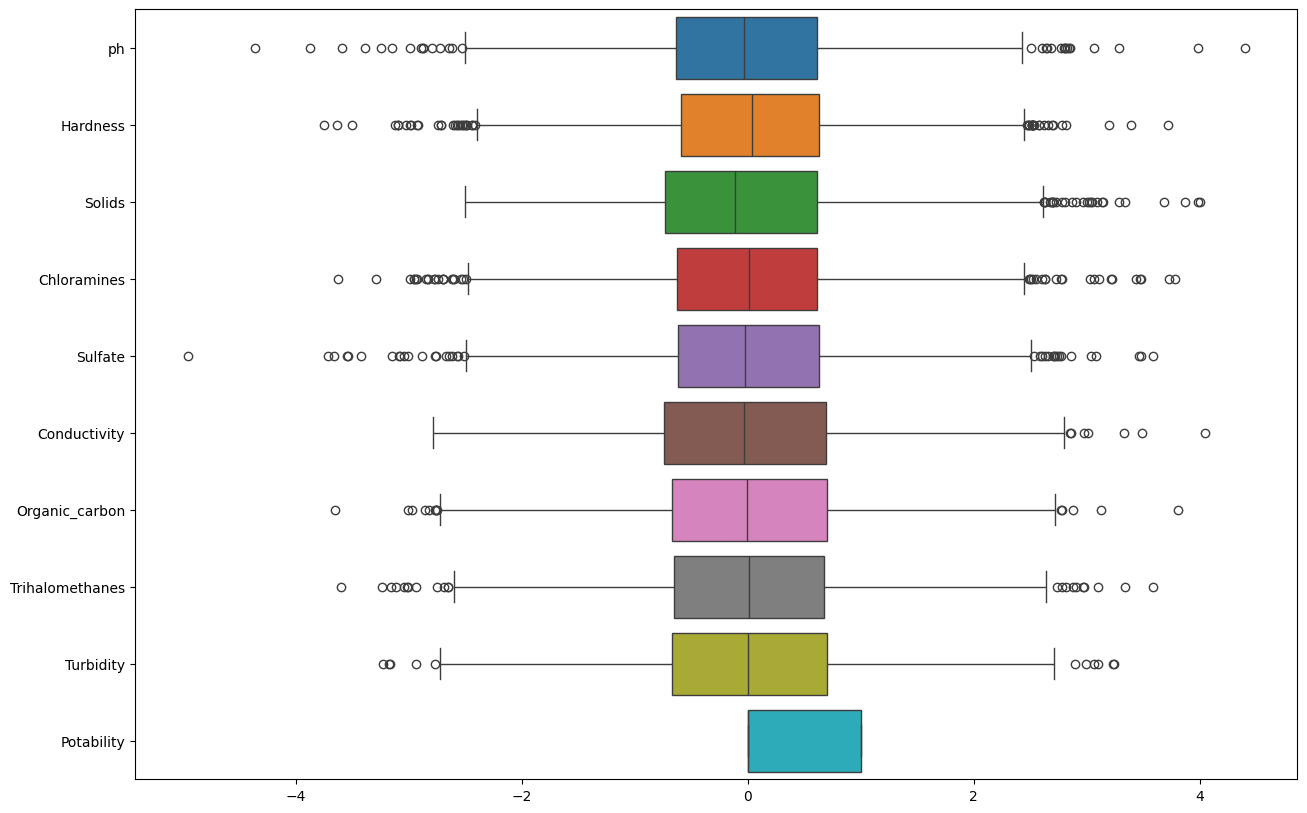

In [56]:
# Boxplot para identificar valores atípicos
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_normalized, orient='h')
plt.show()


In [57]:
# Cálculo del rango intercuartílico (IQR)
Q1 = df_normalized.quantile(0.25)
Q3 = df_normalized.quantile(0.75)
IQR = Q3 - Q1

# Identificación de valores atípicos basados en IQR
outliers = ((df_normalized < (Q1 - 1.5 * IQR)) | (df_normalized > (Q3 + 1.5 * IQR))).any(axis=1)


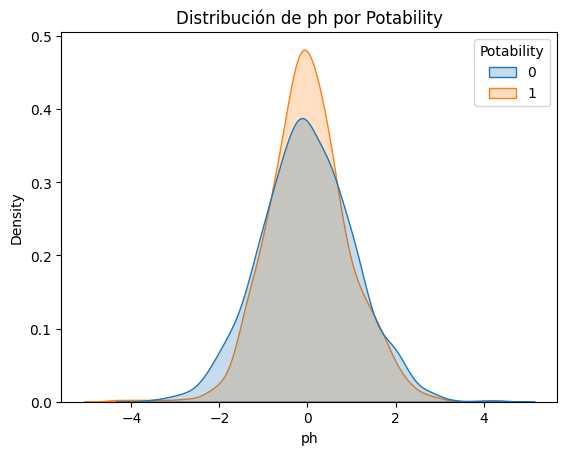

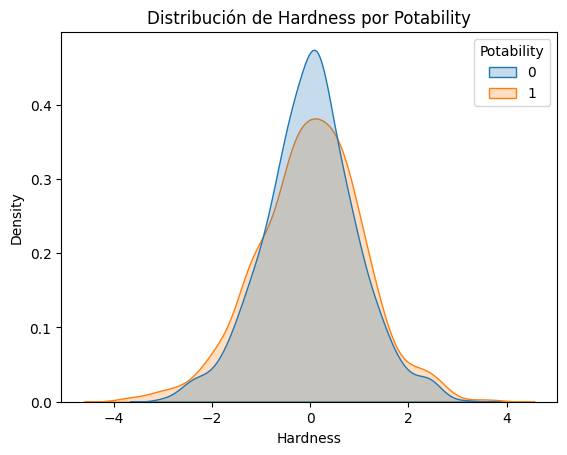

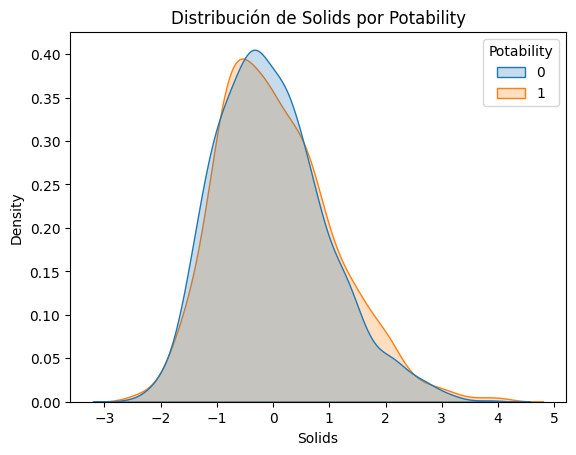

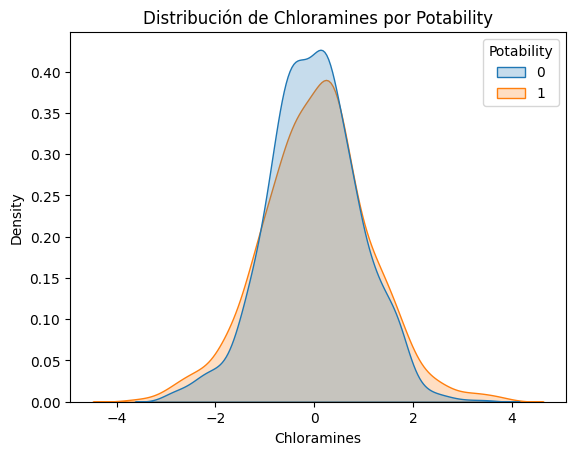

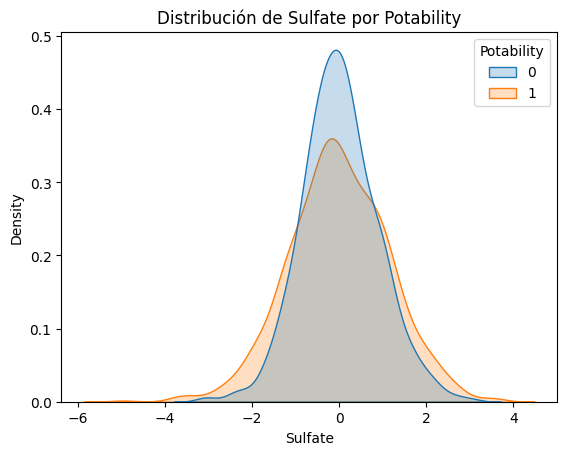

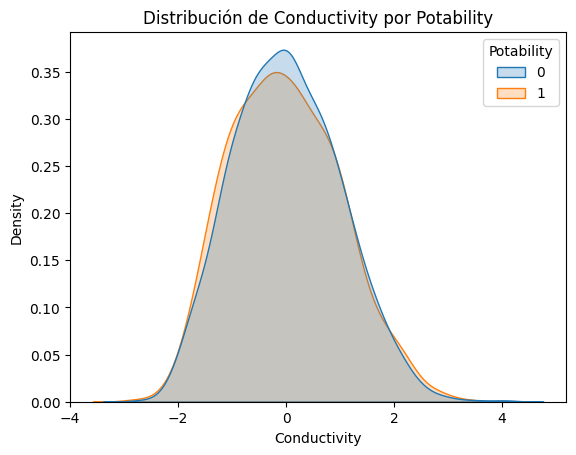

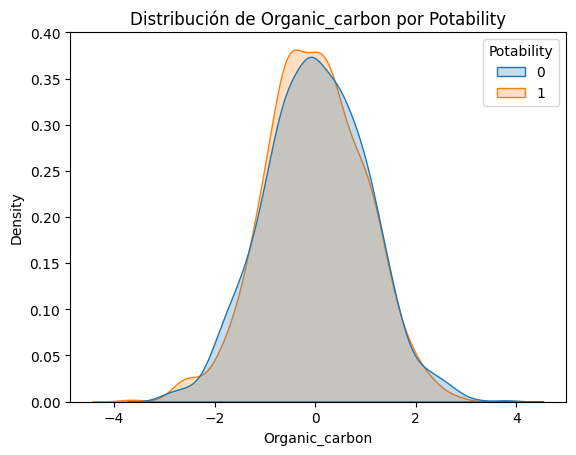

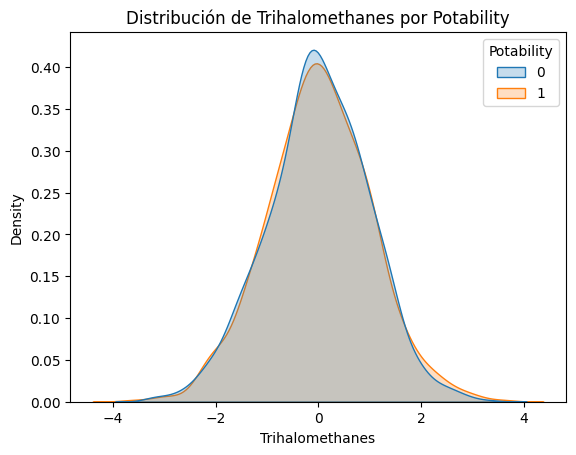

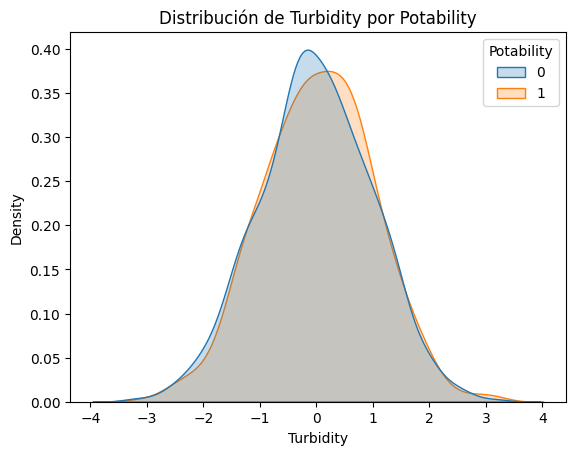

C:\Users\nesto\AppData\Local\Temp\ipykernel_13748\3256588752.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_normalized, x=feature, hue='Potability', fill=True, common_norm=False)


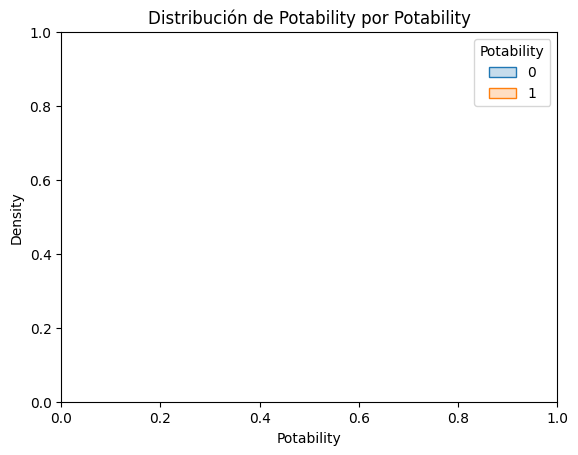

In [58]:
# Visualización de distribuciones después de la normalización
for feature in df_normalized.columns:
    sns.kdeplot(data=df_normalized, x=feature, hue='Potability', fill=True, common_norm=False)
    plt.title(f'Distribución de {feature} por Potability')
    plt.show()


In [59]:
# Check for Categorical Variables (if any, apply encoding)
categorical_columns = df.select_dtypes(include=['object']).columns

if not categorical_columns.empty:
    # Apply encoding (e.g., one-hot encoding)
    df_encoded = pd.get_dummies(df, columns=categorical_columns)
else:
    df_encoded = df.copy()


---------
### Model Selection:

Choose a model that fits the nature of your problem. 
Some common models for classification problems include Logistic Regression, Support Vector Machines (SVM), Random Forests, and Gradient Boosting.


In [60]:
# Inicializa el modelo (puedes elegir otro modelo según tus necesidades)
model = RandomForestClassifier(random_state=42)

### Model Training:

Split your data into training and testing sets, then train the model using the training set.


In [61]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    df_normalized.drop('Potability', axis=1), 
    df_normalized['Potability'], test_size=0.2, random_state=42)

In [62]:
# Entrenamiento del modelo
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Model Evaluation:

Evaluate the model's performance on the test set using relevant metrics for your problem. You can use precision, recall, F1-score, confusion matrix, among other metrics.


In [63]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [64]:
# Evaluación del modelo
print(classification_report(y_test, y_pred))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       231
           1       0.65      0.40      0.50       172

    accuracy                           0.65       403
   macro avg       0.65      0.62      0.62       403
weighted avg       0.65      0.65      0.63       403

Matriz de Confusión:
[[194  37]
 [103  69]]


### Hyperparameter Tuning:

If necessary, you can adjust the model's hyperparameters to improve its performance.


In [65]:
# Definition of Hyperparameters to Tune
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}


In [66]:
# Model Initialization with Grid Search (GridSearchCV)
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [67]:
# Best Found Hyperparameters
best_params = grid_search.best_params_


In [68]:
print(f"Best Hyperparameters: {best_params}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Mejores hiperparámetros: {'max_depth': 10, 'n_estimators': 200}
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.84      0.73       231
           1       0.65      0.40      0.50       172

    accuracy                           0.65       403
   macro avg       0.65      0.62      0.62       403
weighted avg       0.65      0.65      0.63       403

Confusion Matrix:
 [[194  37]
 [103  69]]


Model Evaluation Report:

Best Found Hyperparameters:

Max Depth: 10
Number of Estimators: 200

Model Results on the Test Set:

Overall Accuracy: 65%

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       231
           1       0.65      0.40      0.50       172

    accuracy                           0.65       403
   macro avg       0.65      0.62      0.62       403
weighted avg       0.65      0.65      0.63       403

Confusion Matrix:
[[194  37]
 [103  69]]
